In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df = pd.read_csv('flight.csv')
df.sample(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
32201,24045,12/11/2011,12/11/2011,Male,4,shanghai,shanghai,CN,40.0,3/31/2014,...,6668.0,7413,3/18/2014,14,30.800000,88,0,0.909413,22491,2
15838,39519,10/15/2009,10/16/2009,Male,4,beijing,NaN,CN,43.0,3/31/2014,...,11734.0,17196,3/6/2014,26,61.444444,266,0,0.885776,14594,0
1503,29370,11/4/2005,12/5/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,...,27045.0,49504,2/19/2014,42,22.666667,90,2,1.202572,95271,32
53214,43848,3/30/2011,4/4/2011,Male,4,Ansan-si,Gyeonggi-do,KR,62.0,3/31/2014,...,0.0,2787,1/15/2013,442,71.500000,141,0,0.816667,1638,0
10706,47129,1/29/2005,5/28/2005,Male,4,shenzhen,guangdong,CN,54.0,3/31/2014,...,15379.0,35635,3/19/2014,13,39.750000,304,0,0.586013,14703,0
31688,41765,7/13/2011,7/18/2011,Female,4,shanghai,shanghai,CN,47.0,3/31/2014,...,2087.0,10024,1/9/2014,83,82.428571,239,0,0.689433,5864,0
11652,1998,11/3/2004,11/24/2004,Male,4,shanghai,shanghai,CN,39.0,3/31/2014,...,7661.0,22940,12/25/2013,98,28.285714,123,0,0.851799,17232,0
58859,33986,9/25/2012,10/6/2012,Male,4,huaibei,anhuisheng,CN,47.0,3/31/2014,...,578.0,3237,7/9/2013,267,138.000000,273,0,0.446667,896,0
41449,36666,4/24/2006,5/24/2006,Male,4,beijing,beijing,CN,34.0,3/31/2014,...,1386.0,5420,4/26/2013,341,152.000000,152,0,0.800000,3560,0
19916,19722,8/24/2011,9/21/2011,Male,4,guiyang,guizhou,CN,43.0,3/31/2014,...,4924.0,14910,1/21/2014,71,51.916667,191,0,0.823147,10742,0


## Exploratory Data Analysis

In [4]:
#info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [6]:
#check missing value
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Terdapat beberapa data yang memiliki <i>null value</i>, akan kita proses di data preprocesing

In [8]:
#check duplicate value
df.shape

(62988, 23)

In [10]:
df.duplicated().any()

False

Data kita tidak memiliki duplicate

In [11]:
#check range value dari dataset
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


Semua feature berada pada range yang tepat, meskipun terlihat ada outlier pada beberapa feature

In [12]:
#check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Ada beberapa feature yang mengandung value yang seharusnya bertipe datetime seperti feature FFP_DATE, FIRST_FLIGHT_DATE,LOAD_TIME, dan LAST_FLIGHT_DATE. <br> Kita ubah feature-feature tersebut ke dalam bentuk datetime

In [13]:
#transform dtype that contains date into datetime dtype
date = ['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']
for i in date:
    df[i] = pd.to_datetime(df[i],errors='coerce')

In [14]:
#assign numerical dan categorical value
num = df.select_dtypes(include=['int64','float64'])
nums = num.columns
cat = df.select_dtypes(include=['object'])
cats = cat.columns

In [15]:
#see the distribution of data
num.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


Maximum age is 110, we should think about it. The data seems fine, but some features have outliers, we will see that in univariate analysis

In [16]:
cat.describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62985,60719,59740,62962
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48134,9386,17509,57748


In [18]:
#check categorical feature distribution data
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom GENDER:
Male      48134
Female    14851
Name: GENDER, dtype: int64

Value count kolom WORK_CITY:
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64

Value count kolom WORK_PROVINCE:
guangdong        17509
beijing           8014
shanghai          4998
liaoning          4182
xinjiang          2512
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: WORK_PROVINCE, Length: 1165, dtype: int64

Value count kolom WORK_COUNTRY:
CN    57748
HK      991
JP      875
KR      790
US      575
      ...  
CD        1
BI        1
CM        1
FL        1
GL        1
Name: WORK_COUNTRY, Length: 118, dtype: int64



### Univariate Analysis

#### Boxplot

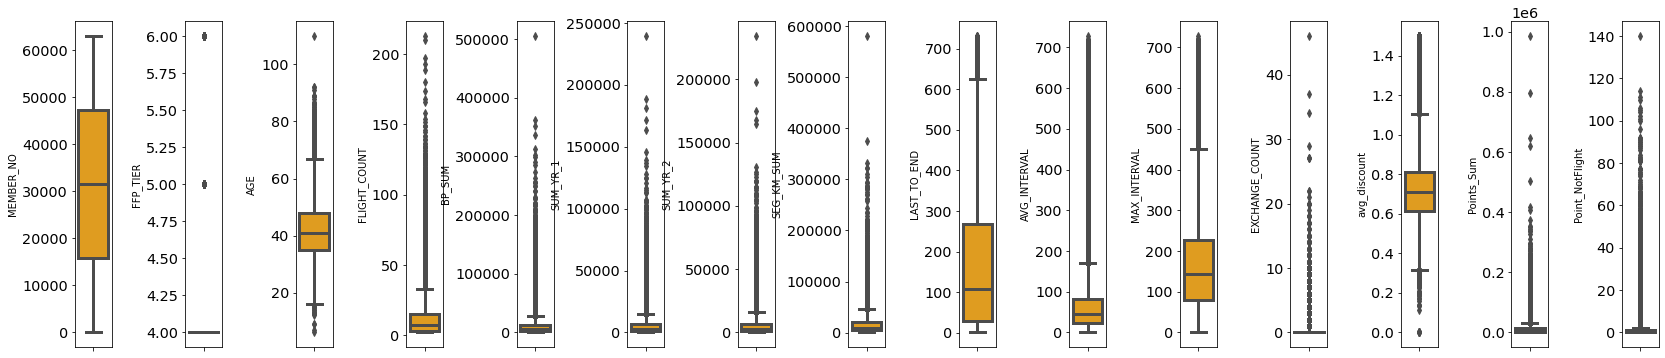

In [19]:
features = nums
plt.figure(figsize=(20,6))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='orange', orient='v')
    plt.subplots_adjust(left=0.1,
                    right=1.2, 
                    wspace=2, 
                    hspace=0.4)
    

Outlier tampak pada beberapa feature seperti `Age`,`FLight_Count`,`BP_SUM`,`SUM_YR_1`,`SUM_YR_1`,`SEG_KM_SUM`,`EXCHANGE_COUNT`,`Points_Sum` dan `Point_NotFlight`

#### Dist Plot

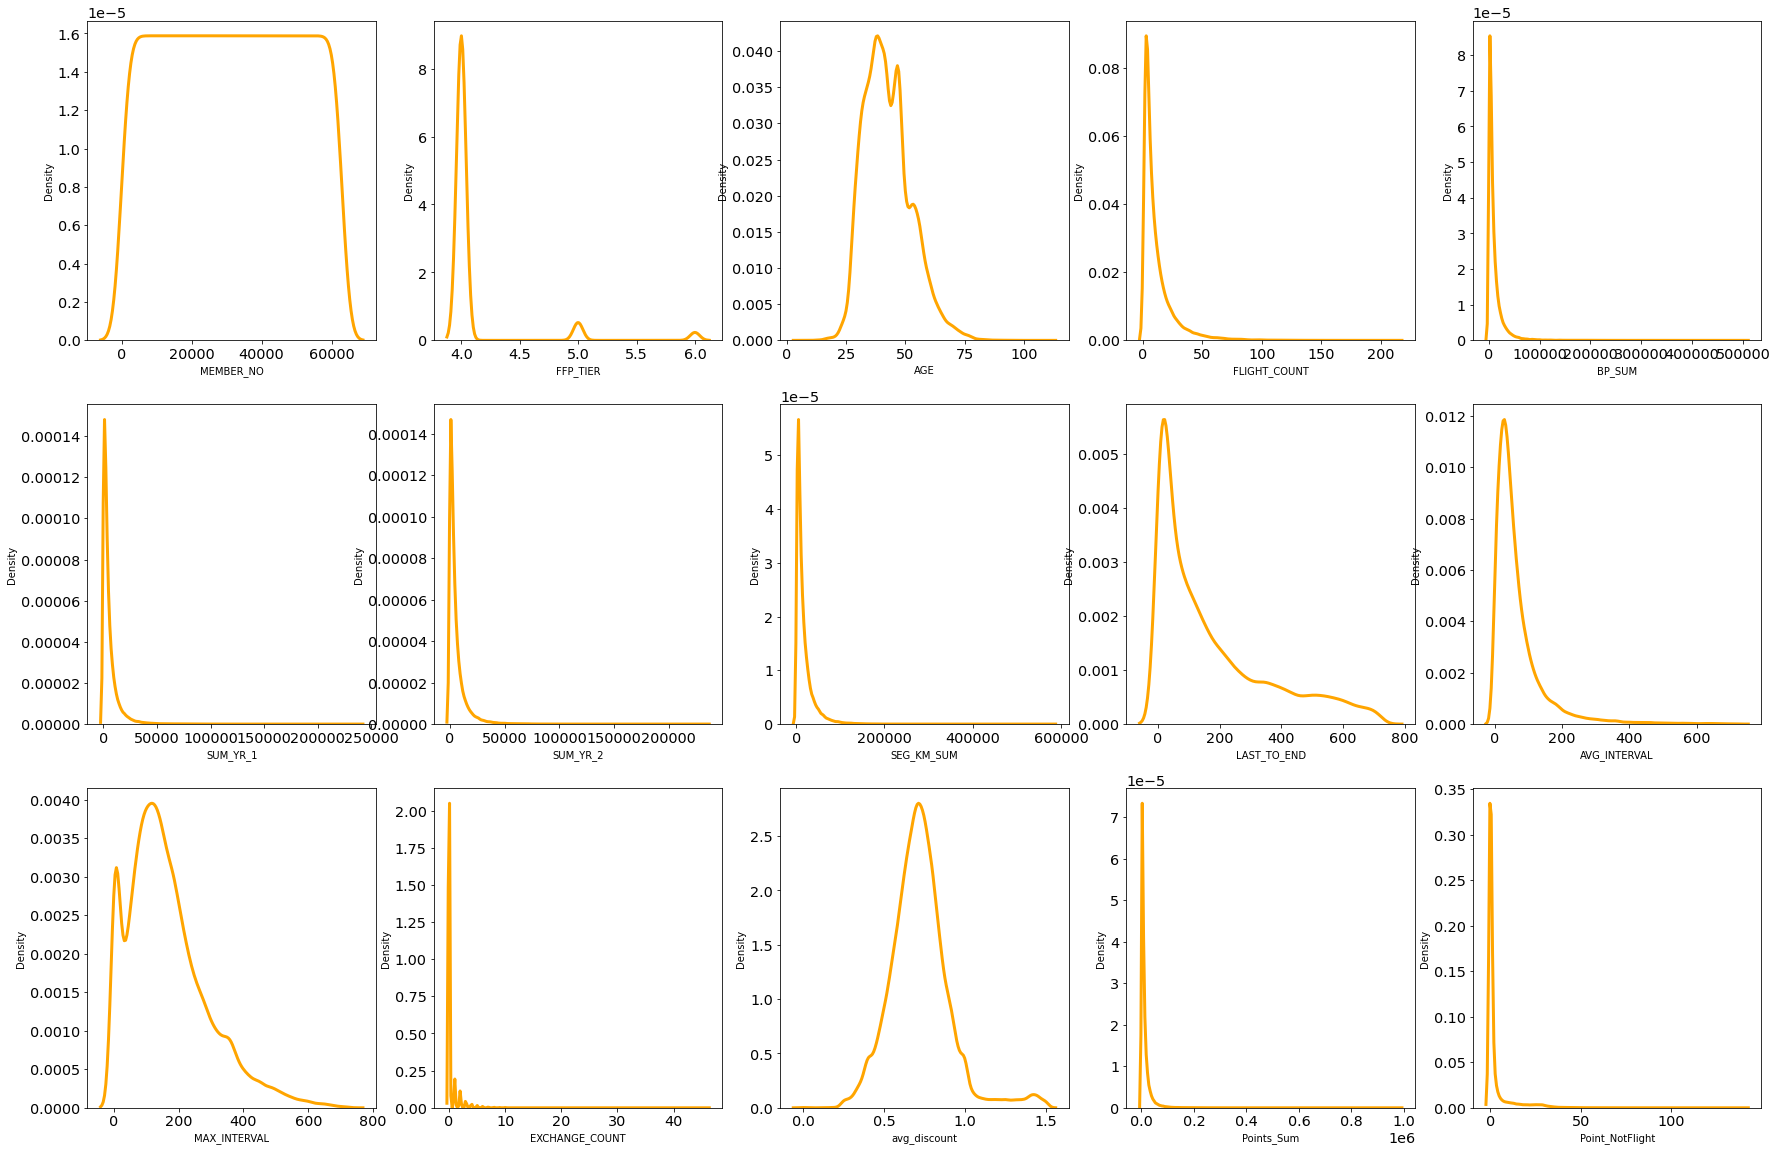

In [20]:
features = nums
plt.figure(figsize=(30, 20))
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[features[i]], color='orange')
    plt.xlabel(features[i])

#### Count Plot (For Categorical Data)

<AxesSubplot:xlabel='GENDER', ylabel='count'>

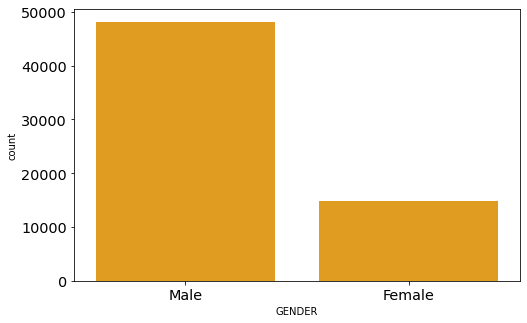

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['GENDER'], color='orange')

### Multivariate Analysis

Text(0.5, 1.0, 'Korelasi')

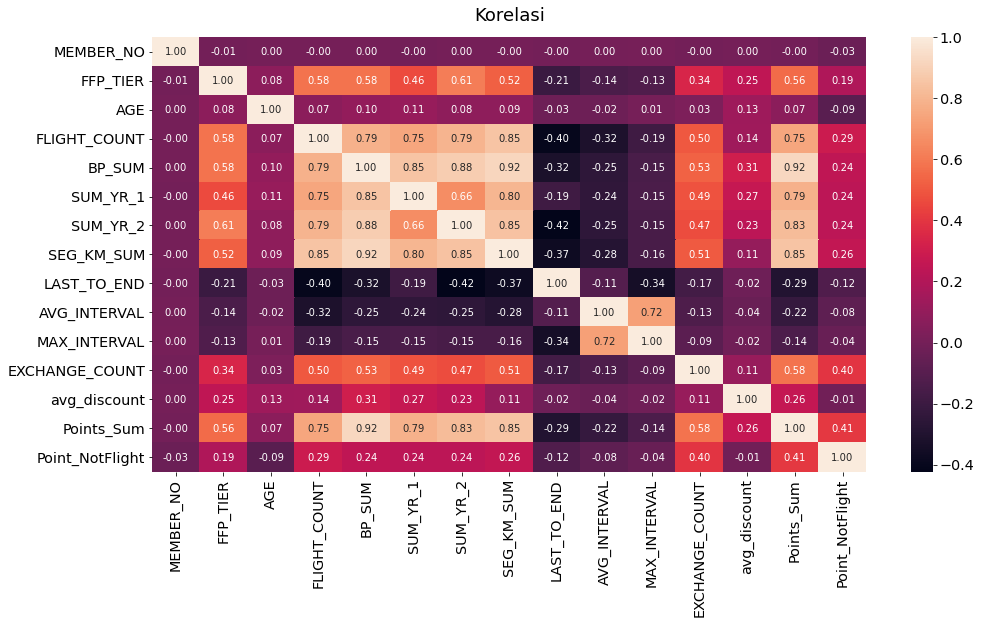

In [14]:
plt.figure(figsize=(16, 8))
heatmaps=sns.heatmap(df[nums].corr(),annot=True,fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

Dengan multikolinearitas threshold sebesar 0.8, beberapa feature tampak memiliki multikolinearitas, yaitu :
1. FLIGHT_COUNT dengan SEG_KM_SUM
2. BP_SUM dengan SUM_YR_1,SUM_YR_2, SEG_KM_SUM dan Points_Sum
3. SUM_YR_1 dengan BP_SUM dan SEG_KM_SUM
4. SUM_YR_2 dengan BP_SUM, SEG_KM_SUM dan Points_Sum
5. SEG_KM_SUM dengan Flight_Count, BP_SUM, SUM_YR_1, SUM_YR_2 dan Points_Sum
6. Points_Sum dengan BP_SUM, SUM_YR_2 dan SEG_KM_SUM <br>


## Feature Selection

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

Untuk clustering, kita perlu memilih beberapa feature yang menjadi penentu dari masing-masing cluster. Berikut feature yang dipilih:
1. Frekuensi Customer memakai jasa penerbangan perusahaan yang diwakilkan dengan feature `FLIGHT_COUNT`
2. Rata-rata pendapatan yang di dapat perusahaan dari customer. Untuk feature ini kita perlu melakukan feature creation terlebih dahulu atas feature `SUM_YR_1`
3. Rata-rata jarak tempuh penerbangan customer. Untuk feature ini kita juga perlu melakukan feature creation terlebih dahulu atas feature `SEG_KM_SUM` <br>
<br>


Adapun alasan untuk memilih feature tersebut adalah :
1. Frekuensi Customer Terbang : Penting untuk mengetahui seberapa sering customer menggunakan jasa penerbangan perusahaan
2. Rata-rata Pendapatan dari Penerbangan : Untuk mengetahui seberapa besar revenue yang kita dapatkan dari masing-masing customer
3. Rata-rata Jarak Tempuh : Untuk mengetahui kebutuhan penerbangan dari setiap customer

Setelah itu mari coba kita lihat feature-feature tersebut ke Data Preprocessing

## Data Preprocessing

In [22]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [23]:
#pilih feature yang diperlukan saja
df_new = df[['FLIGHT_COUNT','SUM_YR_1','SEG_KM_SUM']]
df_new.head()

,FLIGHT_COUNT,SUM_YR_1,SEG_KM_SUM
0,210,239560.0,580717
1,140,171483.0,293678
2,135,163618.0,283712
3,23,116350.0,281336
4,152,124560.0,309928


### Cek missing value

In [24]:
df_new.isna().sum()

FLIGHT_COUNT      0
SUM_YR_1        551
SEG_KM_SUM        0
dtype: int64

`SUM_YR_1`  kita impute dengan nilai median dikarenakan distribusinya skewed

In [26]:
df_new['SUM_YR_1'].fillna(df_new['SUM_YR_1'].median(), inplace=True)

In [27]:
df_new.isna().sum()

FLIGHT_COUNT    0
SUM_YR_1        0
SEG_KM_SUM      0
dtype: int64

### Replace Value

In [28]:
df_new.describe()

,FLIGHT_COUNT,SUM_YR_1,SEG_KM_SUM
count,62988.000000,62988.000000,62988.000000
mean,11.839414,5333.022406,17123.878691
std,14.049471,8077.407958,20960.844623
min,2.000000,0.000000,368.000000
25%,3.000000,1020.000000,4747.000000
50%,7.000000,2800.000000,9994.000000
75%,15.000000,6524.250000,21271.250000
max,213.000000,239560.000000,580717.000000


Nampaknya ada beberapa orang yang tidak membayar biaya perjalanan (minimum SUM_YR_1 = 0) sedangkan minimum Flight Count = 2. Coba kita lihat

In [29]:
a = df_new[(df_new['SUM_YR_1'] == 0) & (df_new['FLIGHT_COUNT'] != 0)]
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9915 entries, 132 to 62986
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FLIGHT_COUNT  9915 non-null   int64  
 1   SUM_YR_1      9915 non-null   float64
 2   SEG_KM_SUM    9915 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 309.8 KB


Terdapat 9915 customer yang kemungkinan terjadi salah input. Dikarenakan nilai SUM_YR_1 skewed, kita impute nilai 0 dengan nilai median

In [31]:
#impute nilai SUM_YR_1 dengan nilai median
df_new['SUM_YR_1'].replace({0:df_new['SUM_YR_1'].median()},inplace=True)

In [32]:
#check
a = df_new[(df_new['SUM_YR_1'] == 0) & (df_new['FLIGHT_COUNT'] != 0)]
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FLIGHT_COUNT  0 non-null      int64  
 1   SUM_YR_1      0 non-null      float64
 2   SEG_KM_SUM    0 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 0.0 bytes


### Outliers Handling

In [33]:
#Outliers handling menggunakan z-score
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df_new)}')

filtered_entries = np.array([True] * len(df_new))

for col in df_new:
    zscore = abs(stats.zscore(df_new[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_new = df_new[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_new)}')

Jumlah baris sebelum memfilter outlier: 62988
Jumlah baris setelah memfilter outlier: 60706


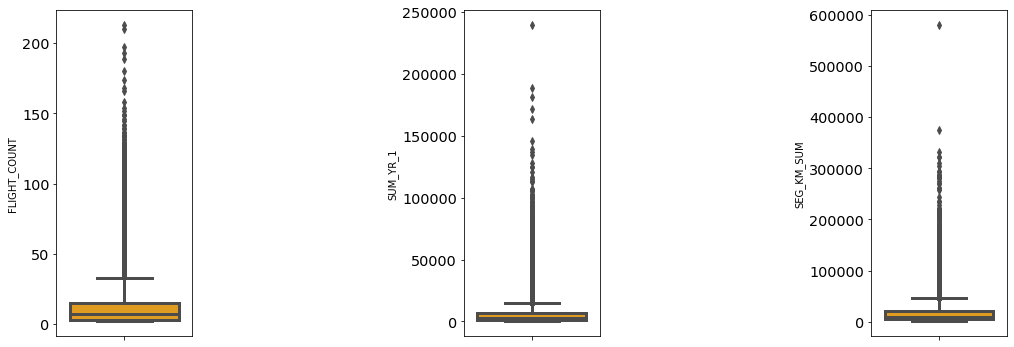

In [34]:
features = df_new.columns
plt.figure(figsize=(12,6))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='orange', orient='v')
    plt.subplots_adjust(left=0.1,
                    right=1.2, 
                    wspace=2, 
                    hspace=0.4)
    

### Feature Creation

`SUM_YR_1` adalah Fare Revenue dari customer, dan `SEG_KM_SUM` adalah Jarak Tempuh dari customer. Kita akan menggunakan nilai rata-rata dari masing-masing feature tersebut.

In [35]:
df_new['AVG_REVENUE'] = df_new['SUM_YR_1'] / df_new['FLIGHT_COUNT']
df_new['AVG_DISTANCE'] = df_new['SEG_KM_SUM'] / df_new['FLIGHT_COUNT']

In [36]:
df_new.describe()

,FLIGHT_COUNT,SUM_YR_1,SEG_KM_SUM,AVG_REVENUE,AVG_DISTANCE
count,60706.000000,60706.000000,60706.000000,60706.000000,60706.000000
mean,10.088854,4751.281624,14417.517428,622.629937,1562.324777
std,9.637087,4587.650526,13782.130758,473.454630,1073.034334
min,2.000000,108.000000,368.000000,5.833333,184.000000
25%,3.000000,2000.000000,4623.000000,307.500000,1059.500000
50%,7.000000,2800.000000,9501.500000,502.303846,1360.562609
75%,13.000000,5911.750000,19451.000000,810.650000,1755.000000
max,53.000000,29269.000000,79971.000000,9124.000000,13320.500000


In [37]:
## buang fitur yang sudah tidak dibutuhkan
df_new = df_new.drop(columns=['SUM_YR_1','SEG_KM_SUM'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60706 entries, 348 to 62987
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FLIGHT_COUNT  60706 non-null  int64  
 1   AVG_REVENUE   60706 non-null  float64
 2   AVG_DISTANCE  60706 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.9 MB


### Standarization

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(df_new.astype(float))
data_std

array([[ 1.85857954,  0.05403804,  0.94815036],
       [ 3.72637922, -0.36186572,  0.02980318],
       [ 4.24521246, -0.14205784, -0.13530668],
       ...,
       [-0.83935332,  1.64192388, -0.24726792],
       [-0.83935332,  1.64192388,  0.37713477],
       [-0.83935332,  1.64192388,  0.51133475]])

## Clustering using K-Means

In [40]:
from sklearn.cluster import KMeans

<AxesSubplot:title={'center':'4 Clusters is The Best Clusters Based on Elbow Method'}>

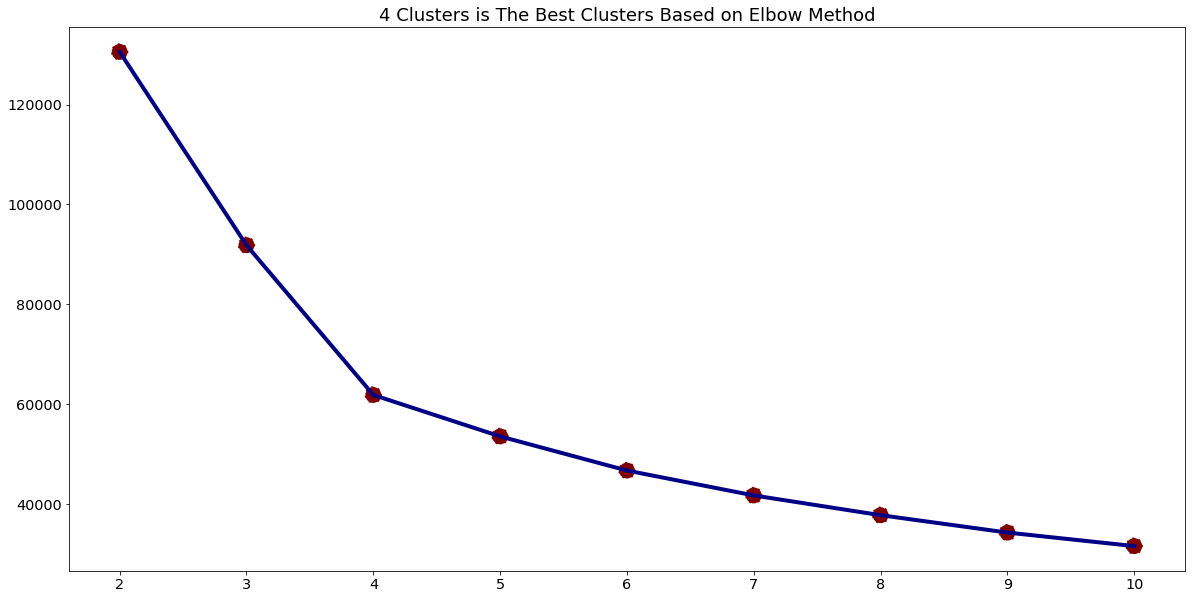

In [44]:
#mencari jumlah cluster yang optimal menggunakan elbow method
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
plt.title('4 Clusters is The Best Clusters Based on Elbow Method', fontsize=18)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

Dari elbow method, jumlah cluster paling optimal adalah 4 cluster, dengan penurunan inertia paling tidak signifikan.

In [45]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(data_std)

In [46]:
df_data_std = pd.DataFrame(data=data_std, columns=list(df_new))
df_data_std

,FLIGHT_COUNT,AVG_REVENUE,AVG_DISTANCE
0,1.858580,0.054038,0.948150
1,3.726379,-0.361866,0.029803
2,4.245212,-0.142058,-0.135307
3,1.339746,1.167424,1.579302
4,3.933913,-0.828194,-0.126834
...,...,...,...
60701,-0.839353,1.641924,-0.927587
60702,-0.631820,0.163417,0.411617
60703,-0.839353,1.641924,-0.247268
60704,-0.839353,1.641924,0.377135


In [47]:
df_data_std['clusters'] = kmeans.labels_
df_new['clusters'] = kmeans.labels_

In [48]:
df_new.sample(5)

,FLIGHT_COUNT,AVG_REVENUE,AVG_DISTANCE,clusters
38558,4,297.500000,2434.25,0
34904,4,700.000000,2220.75,0
58769,2,1400.000000,1042.50,3
45276,6,324.666667,1291.00,0
56236,2,900.000000,1017.00,3


In [49]:
display(df_new.groupby('clusters').mean())

,FLIGHT_COUNT,AVG_REVENUE,AVG_DISTANCE
clusters,,,
0,7.536472,423.098656,1357.423434
1,27.926423,389.796511,1321.328150
2,3.859107,1911.888675,8485.317304
3,3.885460,1216.217164,1825.746834


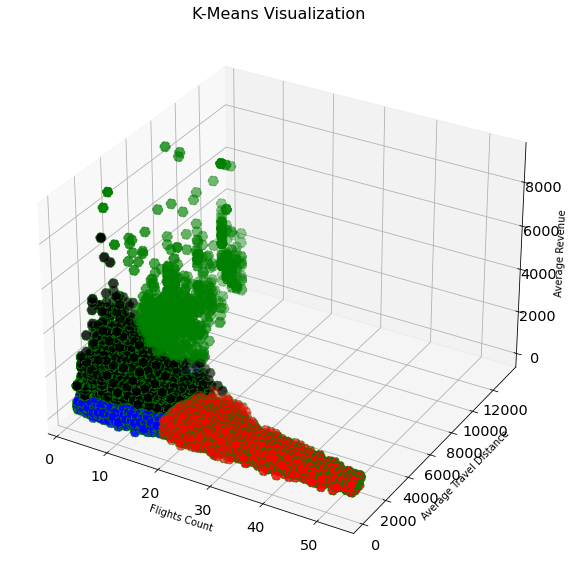

In [50]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new.FLIGHT_COUNT[df_new.clusters == 0], df_new["AVG_DISTANCE"][df_new.clusters == 0], df_new["AVG_REVENUE"][df_new.clusters == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(df_new.FLIGHT_COUNT[df_new.clusters == 1], df_new["AVG_DISTANCE"][df_new.clusters == 1], df_new["AVG_REVENUE"][df_new.clusters == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(df_new.FLIGHT_COUNT[df_new.clusters == 2], df_new["AVG_DISTANCE"][df_new.clusters == 2], df_new["AVG_REVENUE"][df_new.clusters == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(df_new.FLIGHT_COUNT[df_new.clusters == 3], df_new["AVG_DISTANCE"][df_new.clusters == 3], df_new["AVG_REVENUE"][df_new.clusters == 3], c='black', s=100, edgecolor='green',linestyle='--')


plt.xlabel("Flights Count")
plt.ylabel("Average Travel Distance")
ax.set_zlabel('Average Revenue')
plt.title('K-Means Visualization',fontsize=16)
plt.show()

## Business Insight

In [51]:
## Place the label into the original dataframe
df_new

,FLIGHT_COUNT,AVG_REVENUE,AVG_DISTANCE,clusters
348,28,648.214286,2579.714286,1
354,46,451.304348,1594.304348,1
359,51,555.372549,1417.137255,1
371,23,1175.347826,3256.956522,3
390,48,230.520833,1426.229167,1
...,...,...,...,...
62983,2,1400.000000,567.000000,3
62984,4,700.000000,2004.000000,0
62985,2,1400.000000,1297.000000,3
62986,2,1400.000000,1967.000000,3


In [52]:
b = df_new.groupby('clusters').agg({'FLIGHT_COUNT':['mean','median'],
                                   'AVG_REVENUE':['mean','median'],
                                   'AVG_DISTANCE':['mean','median']}).reset_index()
b

clusters FLIGHT_COUNT         AVG_REVENUE              AVG_DISTANCE  \
                   mean median         mean       median         mean   
0        0     7.536472    7.0   423.098656   411.500000  1357.423434   
1        1    27.926423   25.0   389.796511   373.700000  1321.328150   
2        2     3.859107    3.0  1911.888675  1600.000000  8485.317304   
3        3     3.885460    3.0  1216.217164  1170.769231  1825.746834   

                
        median  
0  1293.333333  
1  1280.086957  
2  7604.000000  
3  1709.666667

In [53]:
c = df_new.groupby('clusters').agg({'FLIGHT_COUNT':['mean','count'],
                                   'AVG_REVENUE':['mean'],
                                   'AVG_DISTANCE':['mean']}).reset_index()
c.columns = ['Cluster','Flight Count Mean','Customer Count','Revenue Mean','Distance Mean']

In [55]:
c.to_excel('clustering.xlsx')

### Penjelasan Masing-Masing Cluster

`Cluster 0` : Cluster 0 terdiri dari orang-orang yang mobilitasnya lumayan tinggi tetapi jarak yang ditempuh juga rendah. Fare revenue dari kelompok ini juga rendah. Kelompok ini seperti orang-orang yang meninggalkan kampung halamannya untuk bekerja akan tetapi karena tidak terlalu jauh, mereka masih bisa sering pulang ke kampung halaman<br>
`Cluster 1` : Cluster 1 terdiri dari orang-orang yang mobilitasnya sangat tinggi tetapi jarak yang ditempuh rendah. Fare revenue dari kelompok ini rendah. Kelompok ini seperti pekerja/pebisnis yang memang diharuskan untuk bepergian dinas tetapi hanya di dalam negeri<br>
`Cluster 2` : Cluster 2 terdiri dari orang-orang yang mobilitasnya rendah tetapi jarak yang ditempuh sangatlah jauh. Fare revenue dari kelompok ini tertinggi diantara yang lain. Kelompok ini seperti pebisnis/profesional yang menggunakan penerbangan untuk liburan keluar negeri pada peak season<br>
`Cluster 3` : Cluster 3 terdiri dari orang-orang yang mobilitasnya rendah dengan jarak tempuh yang sedang. Fare revenue dari kelompok ini juga masuk dalam kelompok yang tinggi. Kelompok ini seperti pelancong yang menggunakan penerbangan untuk liburan di dalam negeri/regional pada peak season

### Rekomendasi Bisnis

Berdasarkan insight dan cluster yang kita dapatkan, berikut merupakan rekomendasi bisnis yang kita sarankan:
1. Kita bisa membuat promosi atau bekerjasama dengan travel untuk perjalanan luar negeri untuk meningkatkan jumlah customer di Cluster 2 karena customer pada cluster ini merupakan cluster dengan Fare Revenue tertinggi.
2. Jika dilihat dari distance mean dari cluster 0 dan cluster 1, banyak customer kita yang bepergian lokal (dalam negeri). Kita bisa membuat Ads Campaign bahwa bepergian menggunakan pesawat tidak hanya untuk perjalanan yang jauh.
3. Jika dilihat dari Cluster 1, mobilitas Customer di Cluster 1 sangatlah tinggi. Berdasarkan dari kriteria cluster 1, kita bisa simpulkan bahwa customer pada cluster ini merupakan orang-orang yang memang sering bepergian/melakukan perjalanan dinas. Kita bisa membuat bundling dengan jasa akomodasi untuk meningkatkan revenue pada customer di cluster ini.